In [2]:
def loadFasta(filename):
    """ Parses a classically formatted and possibly 
        compressed FASTA file into a list of headers 
        and fragment sequences for each sequence contained"""
    if (filename.endswith(".gz")):
        fp = gzip.open(filename, 'r')
    else:
        fp = open(filename, 'r')
    # split at headers
    data = fp.read().split('>')
    fp.close()
    # ignore whatever appears before the 1st header
    data.pop(0)     
    headers = []
    sequences = []
    for sequence in data:
        lines = sequence.split('\n')
        headers.append(lines.pop(0))
        # add an extra "+" to make string "1-referenced"
        sequences.append('+' + ''.join(lines))
    return (headers, sequences)

In [3]:
header, seq = loadFasta("data/LTR14A.fa")
print(len(header), "sequences")
for i in range(len(header)):
    print(header[i])
    print(len(seq[i])-1, "bases", seq[i][:30], "...", seq[i][-30:])

1 sequences
DF0000410.4 LTR14A
344 bases +tgggagaaaagctgagtgttgggagagaa ... gacctggtgttgggtctgatcaccccaaca


In [4]:
def revComp(dnaSeq):
    return ''.join([{'A':'T','C':'G','G':'C','T':'A'}[base] for base in reversed(dnaSeq)])

In [5]:
ltr = seq[0].upper()
K = 19
forward = dict([(ltr[i:i+K], i) for i in range(1,len(ltr)-K+1)])
print(len(forward))
rev = "+" + revComp(ltr[1:])
reverse = dict([(rev[i:i+K], -i) for i in range(1,len(rev)-K+1)])
print(len(reverse))

for key in forward:
    if key in reverse:
        print(key)

326
326


In [6]:
print(ltr)

+TGGGAGAAAAGCTGAGTGTTGGGAGAGAAGCTGAGGCAGGGCTTGCATGTCTGCTAGACTTGCTGGCTCCTTGCTTCTAGCACTCCCATTATCTCAAGCAGCCATATGTTTCTCATTCACTTGATACACCGTTTCCTTTCAACCCCCACATCCTCACCACCTGTTTCTTTGTTTGAGCACCAATAAATAGCGTGGGCTCCCAGAGCTCGGGGCCTTCGCAGCCTCCACACTCGCGATGGCCCCCTGGTCCCACTTTCTCTCTCAAACTGTCTTTTTCTCATTCCTTTGACTCCGCCGGACTTCGTCGCCCCCACGACCTGGTGTTGGGTCTGATCACCCCAACA


In [9]:
import time

DATA = "../HumanGenome/"
chromo = [str(i) for i in range(1,23)] + ['X', 'Y', 'MT']

genome = []
kmerCount = {}
for contig in chromo:
    tick = time.time()
    position = []
    with open(DATA+"Chr%s.seq" % contig, 'r') as fp:
        chrseq = fp.read()
    for i in range(1,len(chrseq)-K+1):
        kmer = chrseq[i:i+K]
        if (kmer in forward):
            position.append((i,forward[kmer]))
        elif (kmer in reverse):
            position.append((i,reverse[kmer]))
        else:
            if (len(position) > 2) and (position[-2][1] == 0) and (position[-1][1] == 0):
                position.pop()
            position.append((i,0))
    tock = time.time()
    print(contig, len(chrseq), len(position), "%6.2f secs" % (tock - tick))
    tick = tock
    genome.append(position)

1 248956423 1698 204.91 secs
2 242193530 1265 183.60 secs
3 198295560 1060 147.06 secs
4 190214556 786 139.32 secs
5 181538260 1243 134.12 secs
6 170805980 1393 126.31 secs
7 159345974 1301 115.52 secs
8 145138637 345 105.74 secs
9 138394718 511  99.27 secs
10 133797423 2181  98.29 secs
11 135086623 914  98.86 secs
12 133275310 638  97.36 secs
13 114364329 620  89.17 secs
14 107043719 209  75.30 secs
15 101991190 839  71.69 secs
16 90338346 173  63.42 secs
17 83257442 701  59.18 secs
18 80373286 288  58.21 secs
19 58617617 693  41.02 secs
20 64444168 118  45.42 secs
21 46709984 347  33.19 secs
22 50818469 924  35.43 secs
X 156040896 1665 111.93 secs
Y 57227416 391  39.84 secs
MT 16570 3   0.03 secs


226


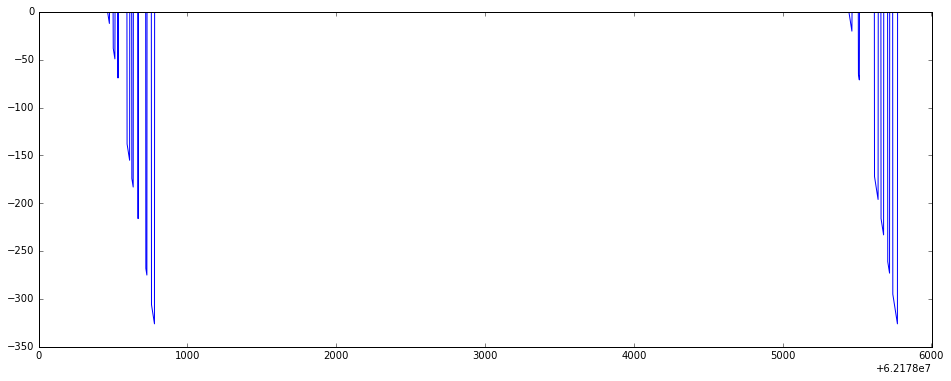

In [16]:
import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

position = genome[0] # chromosome 1

# lo, hi = (0, 250000000)
lo, hi = (62000000, 62500000)
x = [i for i, j in position if i >= lo and i < hi]
y = [j for i, j in position if i >= lo and i < hi]
print(len(x))

fig = plot.figure(figsize=(16,6))
plot.plot(x,y)
plot.show()

In [12]:
for x, y in zip(x,y):
    print(x,y)

62178463 0
62178464 -1
62178465 -2
62178466 -3
62178467 -4
62178468 -5
62178469 -6
62178470 -7
62178471 -8
62178472 -9
62178473 -10
62178474 -11
62178475 -12
62178476 0
62178500 0
62178501 -38
62178502 -39
62178503 -40
62178504 -41
62178505 -42
62178506 -43
62178507 -44
62178508 -45
62178509 -46
62178510 -47
62178511 -48
62178512 -49
62178513 0
62178532 0
62178533 -69
62178534 0
62178593 0
62178594 -138
62178595 -139
62178596 -140
62178597 -141
62178598 -142
62178599 -143
62178600 -144
62178601 -145
62178602 -146
62178603 -147
62178604 -148
62178605 -149
62178606 -150
62178607 -151
62178608 -152
62178609 -153
62178610 -154
62178611 -155
62178612 0
62178625 0
62178626 -174
62178627 -175
62178628 -176
62178629 -177
62178630 -178
62178631 -179
62178632 -180
62178633 -181
62178634 -182
62178635 -183
62178636 0
62178667 0
62178668 -216
62178669 0
62178719 0
62178720 -268
62178721 -269
62178722 -270
62178723 -271
62178724 -272
62178725 -273
62178726 -274
62178727 -275
62178728 0
62178757 0
6

In [14]:
contig = "1"
with open(DATA+"Chr%s.seq" % contig, 'r') as fp:
    chrseq = fp.read()
print(chrseq[62178464:62183771+K])

TGTTGGGGTGATCAGACCCAACACCAGGTCATGGGGACGACGAAGTCCGGCGGAGTCAAAGGAATGATTAAAAAGACAGTTTGAGAGAAGTGGGCCCAGGGGGCCATCGTGTGAGGCTGCGAAGGCCCCAAGCTCTGGGAGCCCACGCTATTTATTGGTGCTCAAAGAAACAGGTGGTGAGGATGTGGGGTTTGAAAAGAAACAGTGTATCAAGTGAATGAGAGACATATGGCTACTTGAGATAATGGCAGTGCTGGAAGCAAGGAGCCAGCAAGTCTAGCACACATGCAAGCTCTGCCTCAGCTTCTCTCCCAACACTCAGCTTTTCTCCCAACATGCCCCCCTTCTCTTTTTTGTAAAAACCGCCACAGCTATCATTATTACTAGCATAAGGTGGCCTCTTTCTAAAATTAATTGAGCAAGGCAATCACAGGCTGTGCAGCCCTTAATTGCCAGTTGGTGATCCAGCTTCATTTTTCTTAGCCCTTATTCAAAATGGAGTCGCTCTGGTTTGAATGCTTCCTACATATTTCCCCTTTCCCTTTTACAGAGGACCCTTAATCCTAGGGGTTGCAGAAGGATGAAGGTCCACCTTCTGTAACTTCATGCTGAATAGGGGCGATGATACTCCTGCCTACCTATTAGGGTCTCTTGTATTCAGGGTAGAGAGGAGTTCAGTCAGAAAGCATTGGTTCGTTAAGTATCTATAGGTAAAACCCTGGCACTCCAGCACTTTCTCAGCATGGCTCATACTAGGGGAACCCAGTCCATGGTTGGGATCCATGGGTCCTTCCAGTCTCCTGTTCCATGGTCGTACACATCTTGAGGGCACCTACGTGGTTTGTTCATCTCCTGCAAAAACACAAGCATACCTTCACCCCCATGTTAGTAAATCTACTGAAACAGAAGCAAAAACGTTTGTGGCTGTAGCTGGGAGGCATGCTATTGCTGAAGCATTTGTAACTCAGCTTCTGCCTCTTTGGTTAATTACCATGGGGCA